# Nobel Prize Analysis
Table of contents:
* [Data Cleaning](#data-cleaning)
* [Data Exploration](#data-exploration)
* [Visualize Trends over Time](#visualize-trends)
* [Countries with the Most Prizes](#choropleth-map)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio


In [2]:
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
pio.renderers.default = 'notebook_connected'


## Data Cleaning <a id='data-cleaning'></a>

In [4]:
df = pd.read_csv('data/nobel_prize_data.csv')
df.sample(frac=0.01)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
476,1977,Medicine,The Nobel Prize in Physiology or Medicine 1977,"""for their discoveries concerning the peptide ...",1/4,Individual,Andrew V. Schally,1926-11-30,Wilno (Vilnius),Poland (Lithuania),Lithuania,Male,Veterans Administration Hospital,"New Orleans, LA",United States of America,LTU
847,2011,Peace,The Nobel Peace Prize 2011,"""for their non-violent struggle for the safety...",1/3,Individual,Ellen Johnson Sirleaf,1938-10-29,Monrovia,Liberia,Liberia,Female,NaN,NaN,NaN,LBR
927,2018,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for integrating climate change into long-run ...,1/2,Individual,William D. Nordhaus,1941-05-31,"Albuquerque, NM",United States of America,United States of America,Male,Yale University,"New Haven, CT",United States of America,USA
332,1961,Physics,The Nobel Prize in Physics 1961,"""for his pioneering studies of electron scatte...",1/2,Individual,Robert Hofstadter,1915-02-05,"New York, NY",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA
94,1919,Medicine,The Nobel Prize in Physiology or Medicine 1919,"""for his discoveries relating to immunity""",1/1,Individual,Jules Bordet,1870-06-13,Soignies,Belgium,Belgium,Male,Brussels University,Brussels,Belgium,BEL
514,1980,Physics,The Nobel Prize in Physics 1980,"""for the discovery of violations of fundamenta...",1/2,Individual,James Watson Cronin,1931-09-29,"Chicago, IL",United States of America,United States of America,Male,University of Chicago,"Chicago, IL",United States of America,USA
27,1905,Literature,The Nobel Prize in Literature 1905,"""because of his outstanding merits as an epic ...",1/1,Individual,Henryk Sienkiewicz,1846-05-05,Wola Okrzejska,Poland,Poland,Male,NaN,NaN,NaN,POL
718,2000,Physics,The Nobel Prize in Physics 2000,"""for basic work on information and communicati...",1/4,Individual,Zhores I. Alferov,1930-03-15,Vitebsk,Union of Soviet Socialist Republics (Belarus),Belarus,Male,A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia,BLR
602,1990,Chemistry,The Nobel Prize in Chemistry 1990,"""for his development of the theory and methodo...",1/1,Individual,Elias James Corey,1928-07-12,"Methuen, MA",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA
401,1970,Chemistry,The Nobel Prize in Chemistry 1970,"""for his discovery of sugar nucleotides and th...",1/1,Individual,Luis F. Leloir,1906-09-06,Paris,France,France,Male,Institute for Biochemical Research,Buenos Aires,Argentina,FRA


Drop `motivation` column, it is unnecessary.

In [5]:
df = df.drop(columns=['motivation'])
df.sample(frac=0.01, random_state=42)


,year,category,prize,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
344,1963,Literature,The Nobel Prize in Literature 1963,1/1,Individual,Giorgos Seferis,1900-03-13,Smyrna (Izmir),Ottoman Empire (Turkey),Turkey,Male,NaN,NaN,NaN,TUR
381,1967,Medicine,The Nobel Prize in Physiology or Medicine 1967,1/3,Individual,Haldan Keffer Hartline,1903-12-22,"Bloomsburg, PA",United States of America,United States of America,Male,Rockefeller University,"New York, NY",United States of America,USA
351,1963,Physics,The Nobel Prize in Physics 1963,1/4,Individual,J. Hans D. Jensen,1907-06-25,Hamburg,Germany,Germany,Male,University of Heidelberg,Heidelberg,Germany,DEU
778,2005,Peace,The Nobel Peace Prize 2005,1/2,Organization,International Atomic Energy Agency (IAEA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,1953,Physics,The Nobel Prize in Physics 1953,1/1,Individual,Frits Zernike,1888-07-16,Amsterdam,Netherlands,Netherlands,Male,Groningen University,Groningen,Netherlands,NLD
667,1996,Literature,The Nobel Prize in Literature 1996,1/1,Individual,Wislawa Szymborska,1923-07-02,Bnin (Kórnik),Poland,Poland,Female,NaN,NaN,NaN,POL
215,1944,Peace,The Nobel Peace Prize 1944,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,1976,Literature,The Nobel Prize in Literature 1976,1/1,Individual,Saul Bellow,1915-06-10,Montreal,Canada,Canada,Male,NaN,NaN,NaN,CAN
86,1916,Literature,The Nobel Prize in Literature 1916,1/1,Individual,Carl Gustaf Verner von Heidenstam,1859-07-06,Olshammar,Sweden,Sweden,Male,NaN,NaN,NaN,SWE
286,1955,Chemistry,The Nobel Prize in Chemistry 1955,1/1,Individual,Vincent du Vigneaud,1901-05-18,"Chicago, IL",United States of America,United States of America,Male,Cornell University,"Ithaca, NY",United States of America,USA


Count categorical values in `['category', 'laureate_type']`.

In [6]:
df.value_counts(subset=['category', 'laureate_type'], dropna=True)


category    laureate_type
Medicine    Individual       222
Physics     Individual       216
Chemistry   Individual       186
Literature  Individual       117
Peace       Individual       103
Economics   Individual        86
Peace       Organization      32
dtype: int64

Except Peace, all other categories were never given to any organizations.

Check for any duplicated rows based on `year`, `category`, `full_name` and `birth_date`.

In [7]:
df.duplicated(subset=['prize', 'category', 'full_name', 'birth_date']).any()


False

No duplicated rows, good. Now check for `NaN` values.

In [8]:
df.isna().sum()


year                       0
category                   0
prize                      0
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

Good, now let's check the data type of each column.

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   prize_share            962 non-null    object
 4   laureate_type          962 non-null    object
 5   full_name              962 non-null    object
 6   birth_date             934 non-null    object
 7   birth_city             931 non-null    object
 8   birth_country          934 non-null    object
 9   birth_country_current  934 non-null    object
 10  sex                    934 non-null    object
 11  organization_name      707 non-null    object
 12  organization_city      707 non-null    object
 13  organization_country   708 non-null    object
 14  ISO                    934 non-null    object
dtypes: int64(1), object(14)

Convert `year` and `birth_date` columns to datetime date type.

In [10]:
df['birth_date'] = pd.to_datetime(df['birth_date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   prize_share            962 non-null    object        
 4   laureate_type          962 non-null    object        
 5   full_name              962 non-null    object        
 6   birth_date             934 non-null    datetime64[ns]
 7   birth_city             931 non-null    object        
 8   birth_country          934 non-null    object        
 9   birth_country_current  934 non-null    object        
 10  sex                    934 non-null    object        
 11  organization_name      707 non-null    object        
 12  organization_city      707 non-null    object        
 13  organ

Create a `prize_pct` column which is the `prize_share` but in the form of a floating point number.

In [11]:
df_prize_share = df['prize_share'].str.split('/', expand=True)
numerator = pd.to_numeric(df_prize_share[0])
denominator = pd.to_numeric(df_prize_share[1])
df['prize_pct'] = numerator / denominator

df.sample(n=5, random_state=42)


,year,category,prize,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_pct
344,1963,Literature,The Nobel Prize in Literature 1963,1/1,Individual,Giorgos Seferis,1900-03-13,Smyrna (Izmir),Ottoman Empire (Turkey),Turkey,Male,NaN,NaN,NaN,TUR,1.000000
381,1967,Medicine,The Nobel Prize in Physiology or Medicine 1967,1/3,Individual,Haldan Keffer Hartline,1903-12-22,"Bloomsburg, PA",United States of America,United States of America,Male,Rockefeller University,"New York, NY",United States of America,USA,0.333333
351,1963,Physics,The Nobel Prize in Physics 1963,1/4,Individual,J. Hans D. Jensen,1907-06-25,Hamburg,Germany,Germany,Male,University of Heidelberg,Heidelberg,Germany,DEU,0.250000
778,2005,Peace,The Nobel Peace Prize 2005,1/2,Organization,International Atomic Energy Agency (IAEA),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
277,1953,Physics,The Nobel Prize in Physics 1953,1/1,Individual,Frits Zernike,1888-07-16,Amsterdam,Netherlands,Netherlands,Male,Groningen University,Groningen,Netherlands,NLD,1.000000


One thing to note here is that since you have dropped many rows from your DataFrame, you could have meesed up the index in your DataFrame. Therefore, the next step is to reset the index.

In [12]:
df = df.reset_index(drop=True)


Now, what have we done so far?
* We dropped unnecessary columns.
* We made sure there are no duplicated rows.
* We dropped rows that contain `NaN` values.
* We converted the `birth_date` column to datetime data type.
* We Created new column called `prize_pct` that is the floating point number form of the `prize_share`.

Let's proceed to the next step which is to investigate our data.

## Data Exploration <a id='data-exploration'></a>

In [13]:
df.sort_values(by='year').head()


,year,category,prize,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.0
1,1901,Literature,The Nobel Prize in Literature 1901,1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.0
3,1901,Peace,The Nobel Peace Prize 1901,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.5
4,1901,Peace,The Nobel Peace Prize 1901,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.5


The first Nobel prizes were awarded in 1901.

What categories were most awarded since 1901?

In [14]:
df_categories = df.groupby('category').count()
df_categories


,year,prize,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_pct
category,,,,,,,,,,,,,,,
Chemistry,186,186,186,186,186,186,186,186,186,186,184,185,186,186,186
Economics,86,86,86,86,86,86,86,86,86,86,84,84,84,86,86
Literature,117,117,117,117,117,117,116,117,117,117,0,0,0,117,117
Medicine,222,222,222,222,222,222,221,222,222,222,221,222,222,222,222
Peace,135,135,135,135,135,107,106,107,107,107,4,4,4,107,135
Physics,216,216,216,216,216,216,216,216,216,216,214,212,212,216,216


In [15]:
fig = px.bar(data_frame=df_categories,
             x=df_categories.index, y='prize', color='prize',
             color_continuous_scale='Aggrnyl',
             title='Nobel Prizes per Category')
fig.update_layout(xaxis={'categoryorder': 'total ascending',
                         'title': 'Nobel Prize Category'},
                  yaxis_title='Number of Prizes',
                  coloraxis_showscale=False)

fig.show()


In [16]:
df[df['category'] == 'Economics'].sort_values(by='year').head()

,year,category,prize,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.5
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.5
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.0
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.0
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.5


So it looks like the Economics category has the least awards.

The first Economics Nobel prize was given to Jan Timbergen in 1969.

Now let's see how the awards given to each gender spread?

In [17]:
df_gender = df.groupby('sex', as_index=False).count()
df_gender[['sex', 'prize']]


,sex,prize
0,Female,58
1,Male,876


Wow, the awards given to Male candidates are 15 times greater than that to Female candidates.

Let's create a donut plot to visualize this better.

In [18]:
fig = px.pie(data_frame=df_gender, names='sex', values='prize',
             hole=0.6, title='Percentage of Nobel Awards Given to Each Gender')
fig.show()


But how each category holds the number of male and female candidates?

In [19]:
df_cat_men_women = df.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
df_cat_men_women.sort_values('sex', ascending=False, inplace=True)


In [20]:
fig = px.bar(data_frame=df_cat_men_women, x='category',
             y='prize',
             color='sex',
             labels={'sex': 'Sex'})
fig.update_layout(xaxis_categoryorder='total ascending')
fig.show()


Overall, the gender imbalance were pretty large per category. The female gender somewhat dedicate more to Peace, Literature and Medicine.

Were there anyone received the Nobel prize more than once?

In [21]:
df_win_over_2 = df[df.duplicated(
    subset=['full_name', 'birth_date'], keep=False)]
df_win_over_2


,year,category,prize,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_pct
18,1903,Physics,The Nobel Prize in Physics 1903,1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.250000
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.000000
89,1917,Peace,The Nobel Peace Prize 1917,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
215,1944,Peace,The Nobel Peace Prize 1944,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.000000
283,1954,Peace,The Nobel Peace Prize 1954,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
297,1956,Physics,The Nobel Prize in Physics 1956,1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.333333
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.000000
340,1962,Peace,The Nobel Peace Prize 1962,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.000000
348,1963,Peace,The Nobel Peace Prize 1963,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000


There were two organizations and 4 individuals won the Nobel prize more than once.

The `International Committee of the Red Cross` won 3 times, the first 2 times were during the devastating World War. All other candidates won twice each.

In [22]:
df_win_over_2['full_name'].value_counts()


Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Marie Curie, née Sklodowska                                                          2
Linus Carl Pauling                                                                   2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Name: full_name, dtype: int64

## Visualize Trends over Time <a id='visualize-trends'></a>

Number of prizes per year:

In [23]:
df_prize_trends = df.groupby('year').count()
df_prize_trends['prize']

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

How prizes are shared between people?

If more prizes were given out, perhaps they were shared between more people.

In [24]:
df_yearly_prize_share = df.groupby('year').agg({'prize_pct': pd.Series.mean})
df_yearly_prize_share

,prize_pct
year,
1901,0.833333
1902,0.714286
1903,0.714286
1904,0.833333
1905,1.000000
...,...
2016,0.545455
2017,0.500000
2018,0.461538


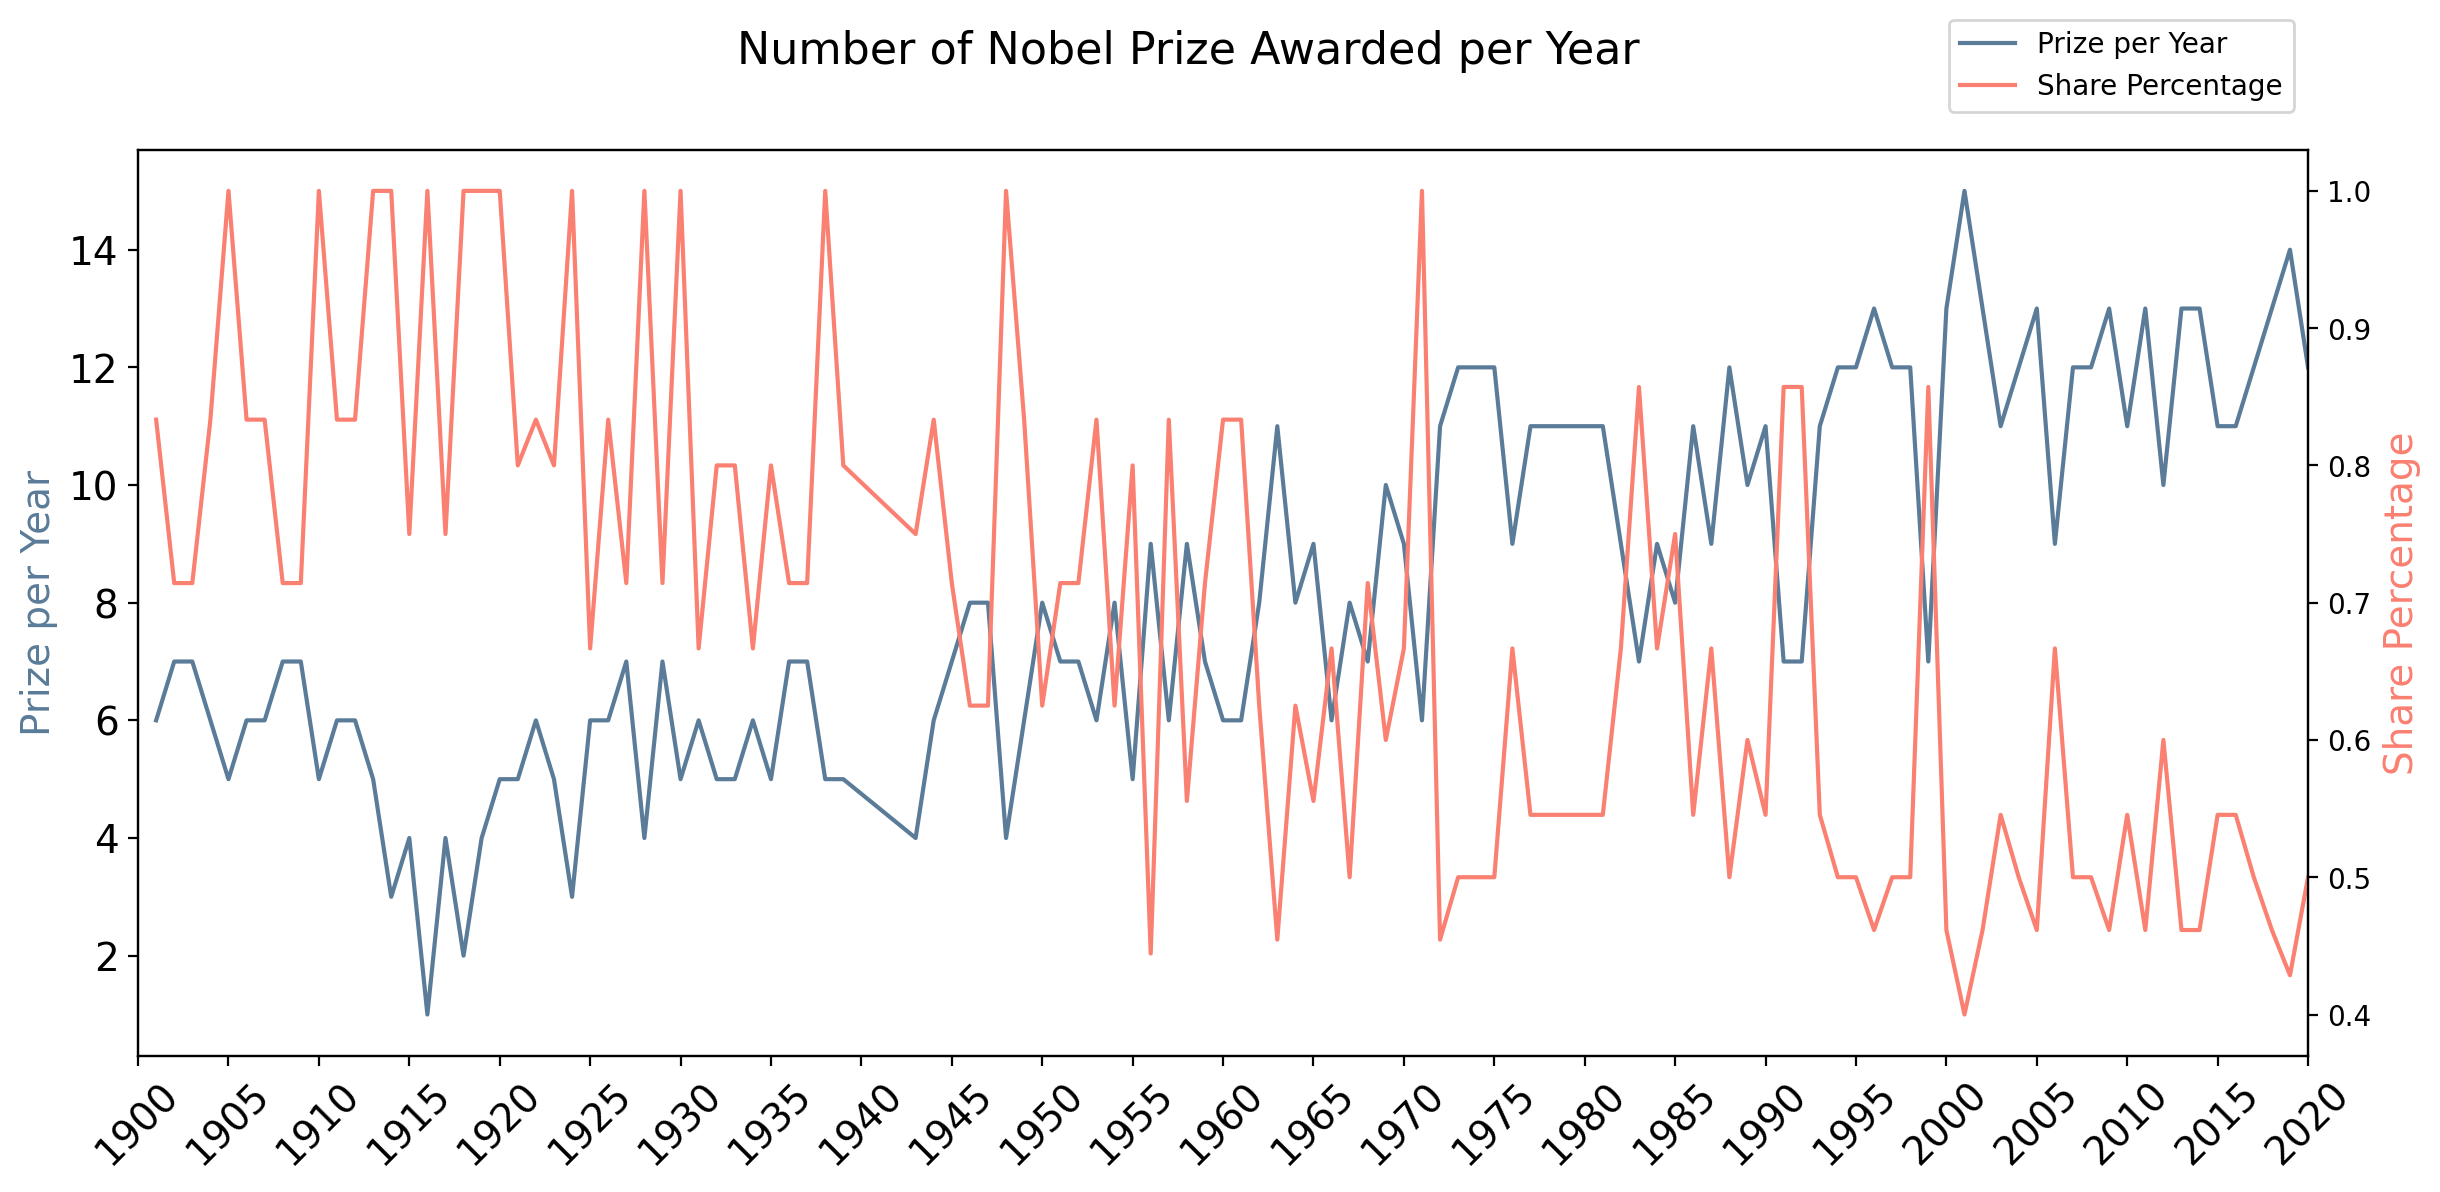

In [25]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=200)
fig.suptitle('Number of Nobel Prize Awarded per Year', fontsize=16)

plt.xticks(np.arange(1900, 2021, step=5), rotation=45, fontsize=14)
plt.yticks(fontsize=14)

ax.set_xlim(left=1900)
ax.set_ylabel('Prize per Year', c='xkcd:slate blue', fontsize=14)
ax.plot(df_prize_trends.index, df_prize_trends.prize, label='Prize per Year', c='xkcd:slate blue')

ax2 = ax.twinx()
ax2.set_ylabel('Share Percentage', c='salmon', fontsize=14)
ax2.plot(df_yearly_prize_share.index, df_yearly_prize_share.values, c='salmon', label='Share Percentage')

fig.legend(loc='upper right', bbox_to_anchor=(0.9, 1))
plt.show()

What do we see on the chart? Well, there is clearly an upward trend in the number of prizes being given out as more and more prizes are shared, hence the downward trend in the share percentage. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars.

## Choropleth Map and The Countries with the Most Prizes <a id='choropleth-map'></a>

Now, we're going to compare which countries received the most prizes for which categories.

In [26]:
df_top20_countries = df.groupby('birth_country_current', as_index=False).count()
df_top20_countries = df_top20_countries.sort_values('prize', ascending=False)[:20][['birth_country_current', 'prize']]
df_top20_countries

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [27]:
fig = px.bar(data_frame=df_top20_countries[::-1],
             x='prize',
             y='birth_country_current',
             color='prize',
             orientation='h',
             color_continuous_scale='blugrn', 
             labels={'prize': 'Prize', 'birth_country_current': 'Country'}, 
             title='Top 20 Countries with most Prizes')
fig.update_layout(yaxis_title='Countries',
                  xaxis_title='Number of Prizes', coloraxis_showscale=False)

fig.show()


Plotting number of prizes of all countries:

In [28]:
df_countries = df.groupby(['birth_country_current', 'ISO'], as_index=False).count()
df_countries = df_countries[['birth_country_current', 'ISO', 'prize']]
df_countries

,birth_country_current,ISO,prize
0,Algeria,DZA,2
1,Argentina,ARG,4
2,Australia,AUS,10
3,Austria,AUT,18
4,Azerbaijan,AZE,1
...,...,...,...
74,United States of America,USA,281
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [29]:
fig = px.choropleth(data_frame=df_countries, locations='ISO', color='prize',
                    color_continuous_scale='Darkmint', labels={'ISO': 'ISO Country Code', 'prize': 'Number of Prizes'})
fig.show()

The USA owns the most prizes. I also notice that my country which is Vietnam did win one Nobel prize. Let's see what is it?

In [30]:
df[df['ISO'] == 'VNM']

,year,category,prize,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_pct
435,1973,Peace,The Nobel Peace Prize 1973,1/2,Organization,Le Duc Tho,1911-10-14,Nam Ha province,Vietnam,Vietnam,Male,NaN,NaN,NaN,VNM,0.5


I googled this and find out some information about my country's Nobel prize. In 1973, Le Duc Tho and Henry Kissinger were jointly awarded the 1973 Nobel Peace Prize for their efforts in negotiating the Paris Peace Accords. However, he declined to accept the award, claiming that the peace in Vietnam had not been established, and that the United States and the South Vietnamese governments were in violation of the Paris Peace Accords.